In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_stats_func import load_NBA_stats

In [72]:
target_col = 'Pos'

df_train, df_test = load_NBA_stats(split_test=True, split_test_elements=10)


df_train, df_test = df_train.drop(['Tm'], axis=1), df_test.drop(['Tm'], axis=1)
df_train = df_train.drop(df_train[df_train['G'] < 10].index, axis=0).reset_index(drop=True)

df_train

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,AST,STL,BLK,TOV,PF,PTS,2022/23 Salary,Salary,2021/22 Salary,2014/15 Salary
0,Beno Udrih,PG,32,79,12,18.9,3.1,6.4,0.487,0.3,...,2.8,0.6,0.1,1.1,1.1,7.7,NaN,2077000,NaN,2077000.0
1,Aleksej Pokusevski,PF,21,31,25,21.8,3.5,7.8,0.440,1.2,...,2.0,0.6,1.3,1.3,1.8,8.8,3261480.0,3261480,NaN,NaN
2,Nick Richards,C,25,55,2,18.1,2.9,4.8,0.618,0.0,...,0.5,0.2,1.1,0.9,2.3,7.9,1782621.0,1782621,NaN,NaN
3,Jalen Williams,SG,21,62,49,29.7,5.3,10.2,0.520,1.0,...,3.2,1.4,0.5,1.6,2.5,13.4,4341480.0,4341480,NaN,NaN
4,Mychal Mulder,PG,27,17,3,14.1,1.4,4.5,0.312,1.0,...,0.3,0.2,0.1,0.5,0.8,4.1,NaN,257902,257902.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Jalen Brunson,SG,25,79,61,31.9,6.4,12.8,0.502,1.2,...,4.8,0.8,0.0,1.6,1.9,16.3,NaN,1802057,1802057.0,NaN
1386,Malaki Branham,SF,19,52,19,22.3,3.6,8.2,0.442,1.1,...,2.0,0.5,0.1,1.1,1.7,9.1,2925600.0,2925600,NaN,NaN
1387,Tony Bradley,C,24,55,7,10.0,1.3,2.2,0.585,0.0,...,0.5,0.2,0.6,0.6,1.1,3.0,NaN,1789256,1789256.0,NaN
1388,Derrick Favors,C,30,39,18,16.7,2.4,4.7,0.516,0.1,...,0.6,0.4,0.3,0.2,1.6,5.3,NaN,9720900,9720900.0,NaN


In [73]:
df_train, df_test = df_train.drop(['Player', 'G', 'GS', '2022/23 Salary', '2021/22 Salary', '2014/15 Salary'], axis=1), df_test.drop(['Player', 'G', 'GS', '2022/23 Salary', '2021/22 Salary', '2014/15 Salary'], axis=1)



In [74]:
dict_imputation = dict()

for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_imputation[col] = round(df_train[col].mean(),3)
    df_train[col].fillna(dict_imputation[col],inplace=True)
    df_test[col].fillna(dict_imputation[col],inplace=True)

In [75]:
dict_imputation

{'Age': 26.121,
 'MP': 21.057,
 'FG': 3.428,
 'FGA': 7.478,
 'FG%': 0.456,
 '3P': 0.935,
 '3PA': 2.656,
 '3P%': 0.317,
 '2P': 2.494,
 '2PA': 4.822,
 '2P%': 0.511,
 'eFG%': 0.517,
 'FT': 1.496,
 'FTA': 1.952,
 'FT%': 0.744,
 'ORB': 0.927,
 'DRB': 2.876,
 'TRB': 3.801,
 'AST': 2.065,
 'STL': 0.662,
 'BLK': 0.413,
 'TOV': 1.175,
 'PF': 1.787,
 'PTS': 9.282,
 'Salary': 7245590.308}

In [76]:
dict_normalize = dict()
for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_normalize[col] = (df_train[col].min(),df_train[col].max())
    df_train[col] = df_train[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
    df_test[col] = df_test[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
dict_normalize

{'Age': (19, 41),
 'MP': (2.5, 38.7),
 'FG': (0.1, 11.4),
 'FGA': (0.5, 22.6),
 'FG%': (0.125, 0.828),
 '3P': (0.0, 5.0),
 '3PA': (0.0, 11.7),
 '3P%': (0.0, 1.0),
 '2P': (0.1, 10.2),
 '2PA': (0.1, 18.5),
 '2P%': (0.083, 1.0),
 'eFG%': (0.15, 0.85),
 'FT': (0.0, 10.2),
 'FTA': (0.0, 12.7),
 'FT%': (0.0, 1.0),
 'ORB': (0.0, 5.3),
 'DRB': (0.1, 11.0),
 'TRB': (0.3, 15.0),
 'AST': (0.0, 10.8),
 'STL': (0.0, 2.3),
 'BLK': (0.0, 3.2),
 'TOV': (0.0, 4.5),
 'PF': (0.1, 4.1),
 'PTS': (0.3, 33.4),
 'Salary': (53716, 48070014)}

In [77]:
df_train

,Pos,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,PG,0.590909,0.453039,0.265487,0.266968,0.514936,0.06,0.102564,0.268,0.267327,...,0.056604,0.137615,0.102041,0.259259,0.260870,0.03125,0.244444,0.250,0.223565,0.042137
1,PF,0.090909,0.533149,0.300885,0.330317,0.448080,0.24,0.282051,0.376,0.207921,...,0.283019,0.321101,0.326531,0.185185,0.260870,0.40625,0.288889,0.425,0.256798,0.066806
2,C,0.272727,0.430939,0.247788,0.194570,0.701280,0.00,0.000000,0.317,0.277228,...,0.433962,0.321101,0.380952,0.046296,0.086957,0.34375,0.200000,0.550,0.229607,0.036007
3,SG,0.090909,0.751381,0.460177,0.438914,0.561878,0.20,0.230769,0.347,0.425743,...,0.188679,0.284404,0.272109,0.296296,0.608696,0.15625,0.355556,0.600,0.395770,0.089298
4,PG,0.363636,0.320442,0.115044,0.180995,0.266003,0.20,0.273504,0.315,0.029703,...,0.018868,0.110092,0.074830,0.027778,0.086957,0.03125,0.111111,0.175,0.114804,0.004252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,SG,0.272727,0.812155,0.557522,0.556561,0.536273,0.24,0.273504,0.373,0.504950,...,0.094340,0.302752,0.244898,0.444444,0.347826,0.00000,0.355556,0.450,0.483384,0.036411
1386,SF,0.000000,0.546961,0.309735,0.348416,0.450925,0.22,0.299145,0.304,0.247525,...,0.075472,0.174312,0.142857,0.185185,0.217391,0.03125,0.244444,0.400,0.265861,0.059811
1387,C,0.227273,0.207182,0.106195,0.076923,0.654339,0.00,0.000000,0.317,0.118812,...,0.226415,0.192661,0.210884,0.046296,0.086957,0.18750,0.133333,0.250,0.081571,0.036145
1388,C,0.500000,0.392265,0.203540,0.190045,0.556188,0.02,0.034188,0.125,0.227723,...,0.283019,0.284404,0.299320,0.055556,0.173913,0.09375,0.044444,0.375,0.151057,0.201331


In [78]:
def knn_class(df_train, k, target_col,observation, use_weighted_vote ):
   validation = df_train[target_col].copy()
   train = df_train.drop([target_col], axis=1)
   observed_clean = observation.drop([target_col])
   norms = np.linalg.norm((train-observed_clean).astype(float), axis=1)
   idx = np.argpartition(norms,k)[:k]
   if use_weighted_vote:
      weighted_sum = {key: 0 for key in validation.value_counts().index}
      weights = 1/(norms**2)
      for i in idx:
         weighted_sum[validation[i]] += weights[i]
      return max(weighted_sum, key=weighted_sum.get)
   nearest_types = validation.take(idx)
   return nearest_types.mode()[0]

In [79]:
poss_k = [1,3,7,11,13,15,17,23,29,35,45,75] # possible k's
acc_k_majority = list(np.zeros(len(poss_k))) # Accuracy for each value of k using majority voting
acc_k_weighted = list(np.zeros(len(poss_k))) # Accuracy for each value of k using weighted voting

def get_acc(s_1, s_2):
    return sum(s_1 == s_2)/len(s_1)

for j, k in enumerate(poss_k):
    majority_predicitons = np.array([])
    weighted_predictions = np.array([])
    for i in range(len(df_test)):
        majority_predicitons = np.append(majority_predicitons,knn_class(df_train, k, target_col,df_test.iloc[i], False))
        weighted_predictions = np.append(weighted_predictions,knn_class(df_train, k,target_col,df_test.iloc[i], True))
    acc_k_majority[j] = get_acc(majority_predicitons,df_test[target_col])
    acc_k_weighted[j] = get_acc(weighted_predictions,df_test[target_col])

print(f"Max Accuracy: {max(acc_k_weighted)*100}%; For k-value of {poss_k[np.argmax(acc_k_weighted, keepdims=True)[0]]} ")


Max Accuracy: 80.0%; For k-value of 3 


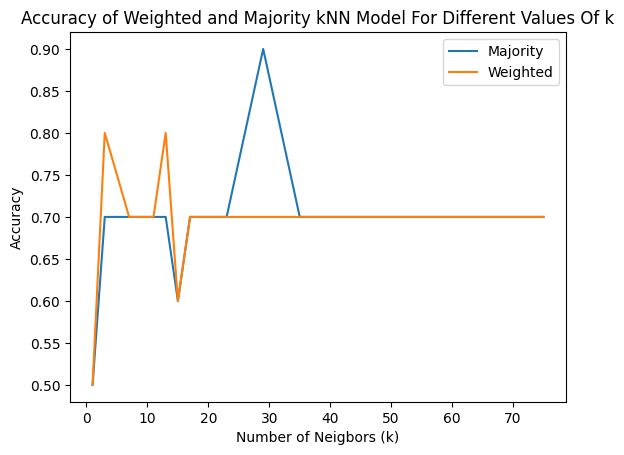

In [80]:
plt.plot(poss_k,acc_k_majority, label='Majority')
plt.plot(poss_k,acc_k_weighted,label='Weighted')
plt.xlabel('Number of Neigbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted and Majority kNN Model For Different Values Of k')
plt.legend()
plt.show()